## **Data Analysis and Visualisation on GDP - WORLD**#
                                                       
*By:Pooja Arora*

**********************************************************************************************************


Gross domestic product (GDP) is a monetary measure of the market value of all final goods and services produced in a period (quarterly or yearly) of time. GDP gives a rough estimate of the wealth and prosperity of the nation.
It is considered as an important factor for any nation as it roughly correlates with a nation's life           expectancy,average income of a person,amount of energy that nation consumes,and the average level of education of its citizens.
Below is a brief analysis of the world gdp.

High income            77
Upper middle income    56
Lower middle income    53
Low income             31
Name: IncomeGroup, dtype: int64

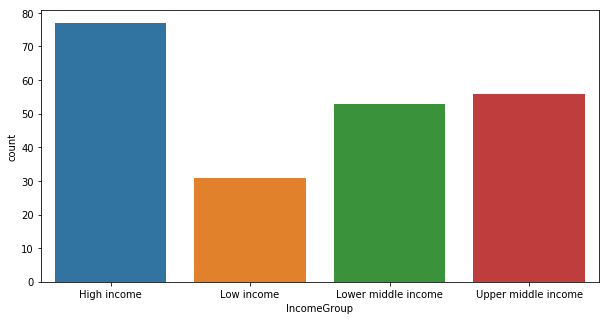

In [4]:
import pandas as pd#data analysis
import matplotlib.pyplot as plt#plotting
import seaborn as sns
gd=pd.read_excel('data/gdp.xls', sheet_name='Metadata - Countries', 
index_col = 'Region' , na_values=['NA'])
gd[['IncomeGroup']]
plt.figure(figsize=(10,5))
sns.countplot(gd['IncomeGroup'])
gd['IncomeGroup'].value_counts()

From the above analysis on the basis of world GDP, we conclude that out of 217 countries there are:

- 77 countries with High Income
- 56 countries with Upper Middle Income
- 53 countries with Lower Middle Income
- 31 countries with Low Income

As per my analysis most of the countries fall in the middle income group while being almost equally distributed between the upper middle and lower middle income groups.

**Top 10 Poorest Countries.**

In [5]:
gd=pd.read_excel('data/gdp.xls', sheet_name='Data', index_col = 'Country Name' ,
skiprows=3,header=0,na_values=['NA'])
g=gd[['2016']]
smal=g.nsmallest(10, '2016')
print(smal)
explode_item=[0.2,0,0,0,0,0,0,0,0,0]
smal.plot(kind='pie',subplots=True,figsize=(5,5),explode=explode_item,
autopct='%1.0f%%',pctdistance=0.9,legend=False)
print("top 10 poorest countries")

                                 2016
Country Name                         
Central African Republic   698.706656
Burundi                    777.752852
Congo, Dem. Rep.           801.630120
Liberia                    812.673944
Niger                      986.206961
Malawi                    1168.825626
Mozambique                1216.792787
Sierra Leone              1476.213720
Togo                      1490.536236
Madagascar                1506.238325


top 10 poorest countries


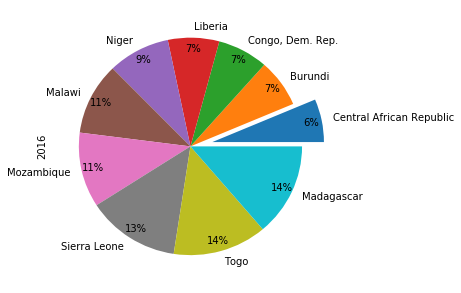

In [7]:
explode_item=[0.2,0,0,0,0,0,0,0,0,0]
smal.plot(kind='pie',subplots=True,figsize=(5,5),explode=explode_item,
autopct='%1.0f%%',pctdistance=0.9,legend=False)
print("top 10 poorest countries")

Above is the analysis of top 10 poorest countries in the year 2016.Acoording to my analysis(data published in 2016),the most poorest country was Central African Republic.

**Top 10 Richest Countries**

In [8]:
gd=pd.read_excel('data/gdp.xls', sheet_name='Data', index_col = 'Country Name' , 
skiprows=3,header=0,na_values=['NA'])
g=gd[['2016']]
larg=g.nlargest(10, '2016')
print(larg)
explode_item=[0.2,0,0,0,0,0,0,0,0,0]
larg.plot(kind='pie',subplots=True,autopct='%1.0f%%',explode=explode_item,
pctdistance=0.9,figsize=(5,5),legend=False)
print("Top 10 richest countries")


                               2016
Country Name                       
Qatar                 127480.482511
Macao SAR, China      105420.414237
Luxembourg            102389.437728
Singapore              87832.586514
Brunei Darussalam      77420.612172
Kuwait                 74263.998626
United Arab Emirates   72399.653473
Ireland                71472.295965
Switzerland            63888.732387
San Marino             60932.930037


Top 10 richest countries


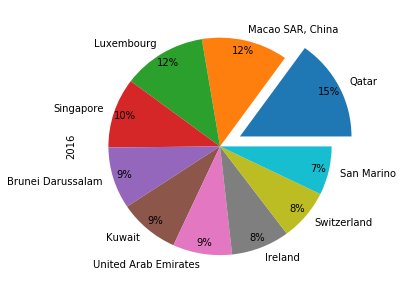

In [10]:
explode_item=[0.2,0,0,0,0,0,0,0,0,0]
larg.plot(kind='pie',subplots=True,autopct='%1.0f%%',explode=explode_item,
pctdistance=0.9,figsize=(5,5),legend=False)
print("Top 10 richest countries")

Above is the analysis of top 10 richest countries in the year 2016.Acoording to my analysis(data published in 2016),the most richest country was Qatar.

# Let`s talk about India 

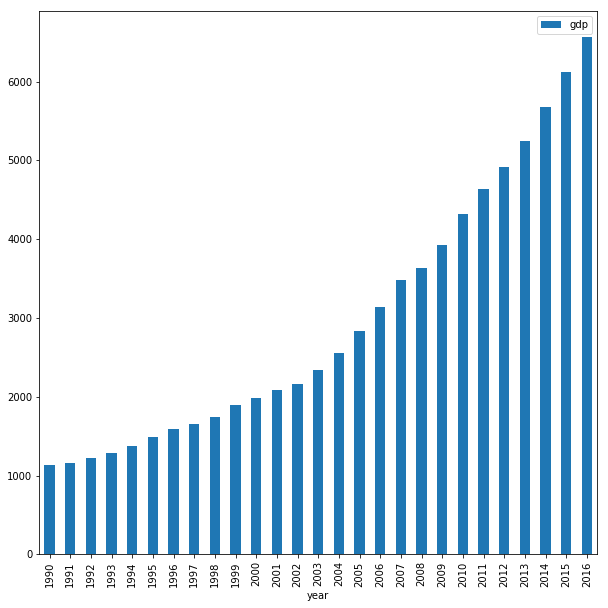

In [3]:
gd=pd.read_excel('data/gdp.xls', sheet_name='Data', index_col = 'Country Name' , 
skiprows=3,header=0,na_values=['NA'])
labels=[str(i) for i in range(1990,2017)]
india=gd.loc["India","1990":"2016"].reset_index()
india.columns=['year','gdp']
india.set_index('year',inplace=True)
india.plot(kind='bar',figsize=(10,10))

According to my analysis(1990-2016) of India,GDP per capita of India was extremely low in the previous years but is seen increasing gradually.

In [126]:
exp=pd.read_excel('data/export.xlsx')#% of gdp in exports of goods and services
exp=exp[exp.filter(regex='^(?!Unnamed)').columns]
exp.set_index("Countries", inplace=True)


** Percentage of Services and Exports of the total gdp of India**

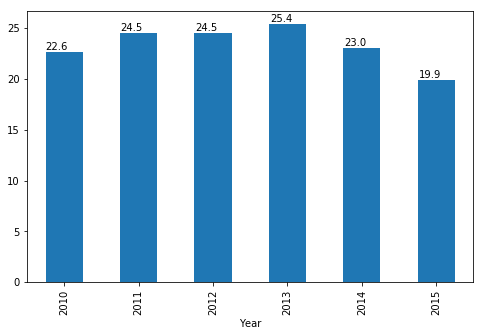

In [21]:
ind=exp.loc[['India'],['2010','2011','2012','2013','2014','2015']].transpose()
ind.index=ind.index.astype(int)
ind.India=ind.India.astype(float)
ind.index.rename('Year',inplace=True)
ax=ind.plot(kind='bar',legend=False,figsize=(8,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() + 0.2))

According to the above analysis of India (2010-215), i conclude that the maximum percentage of the tota in the year 2013 ie 25.4% of the total gdp of india.

**Division of Income groups according to regions.**

In [70]:
def update_region(region):
    if region=='Latin America & Caribbean':
        return 0
    elif region=='South Asia':
        return 1
    elif region=='Sub-Saharan Africa':
        return 2
    elif region=='Europe & Central Asia':
        return 3
    elif region=='Middle East & North Africa':
        return 4
    elif region=='East Asia & Pacific':
        return 5
    elif region=='North America':
        return 6
    else:
        return 7
gdp.loc[:,'regionIndex']=gdp.Region
gdp.regionIndex=gdp.regionIndex.apply(update_region)
gdp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
    def update_IncomeGroup(IncomeGroup):
    if IncomeGroup=='Low income':
        return 1
    elif IncomeGroup=='Lower middle income':
        return 2
    elif IncomeGroup=='Upper middle income':
        return 3
    elif IncomeGroup=='High income':
        return 4
    else:
        return 5
gdp.loc[:,'iIndex']=gdp.IncomeGroup
gdp.iIndex=gdp.iIndex.apply(update_IncomeGroup)
ax=gdp.plot.scatter(x='regionIndex',y='iIndex',rot=90)
ax.set_xticklabels([0,'Latin America & Caribbean','South Asia',
'Sub-Saharan Africa','Europe & Central Asia', 
'Middle East & North Africa','East Asia & Pacific', 'North America',
'unspecified'])
ax.set_yticklabels([1.0,'Low Income   1',1.5,'Lower Middle Income   2', 
2.5,'Upper Middle Income   3',3.5,'High Income   4'])
plt.show()

In [71]:
gdp.loc[:,'regionIndex']=gdp.Region

In [72]:
gdp.regionIndex=gdp.regionIndex.apply(update_region)

In [74]:
gdp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [125]:
def update_IncomeGroup(IncomeGroup):
    if IncomeGroup=='Low income':
        return 1
    elif IncomeGroup=='Lower middle income':
        return 2
    elif IncomeGroup=='Upper middle income':
        return 3
    elif IncomeGroup=='High income':
        return 4
    else:
        return 5
gdp.loc[:,'iIndex']=gdp.IncomeGroup

gdp.iIndex=gdp.iIndex.apply(update_IncomeGroup)

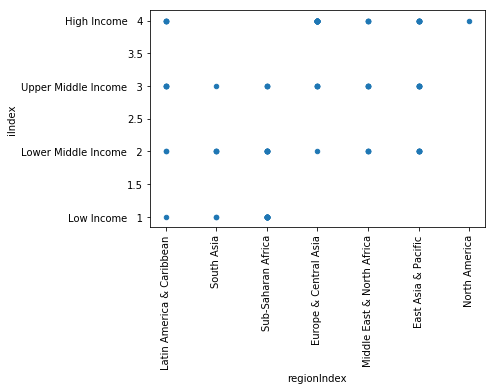

In [105]:
ax=gdp.plot.scatter(x='regionIndex',y='iIndex',rot=90)
ax.set_xticklabels([0,'Latin America & Caribbean','South Asia', 'Sub-Saharan Africa','Europe & Central Asia', 
'Middle East & North Africa','East Asia & Pacific', 'North America','unspecified'])
ax.set_yticklabels([1.0,'Low Income   1',1.5,'Lower Middle Income   2', 2.5,'Upper Middle Income   3',3.5,'High Income   4'])
plt.show()

From the above analysis of the year 2016, i conclude that:

1. Latin America & Caribbean is the region which has all types of income groups.

2. South Asia and Sub-Saharan Africa is deprived of high income group.

3. Europe & Central Asia, Middle East &North Africa,East Asia & Pacific regions are in the same income groups.None of the regions fall in low income group.

4. Region of North America has the highest income group ie. High Income group 

